In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import os
# !pwd

data = pd.read_csv(r"~/Desktop/DataCoSupplyChainDataset.csv", encoding='cp1252')
# print(data)

In [3]:
## Data Exploring :

# Let me see all attributes
pd.options.display.max_columns=60 # this allows me to view all the columns


# data.shape # dimension of my dataset: 180519 x 53
# data.info() # 'Order Zipcode' column seems to have some NULLs, 'Product Description' is all NULLs
# Possible to exclude these 
# data.describe() # statistics


# data.head() 

# data['Customer Country'].unique()
# data['Customer Country'][data['Customer Country']=='EE. UU.'].count()
# data['Customer Country'][data['Customer Country']=='Puerto Rico'].count()


# Subset data: US-Only
sub_data = data[data['Customer Country']=='EE. UU.'] 

# Subset data: Attributes to consider
### Order Zip Code has a few NULL values and 'Product Description' is all NULL values. 
sub_data = sub_data.loc[:,['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'Product Price', 'shipping date (DateOrders)', 'Shipping Mode']]

# Orig dim: 180519 x 53
# Subset dim: 111146 x 35

sub_data.head()

# data['Product Name'].unique()
# data['product']

# sub_data.shape

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Consumer,CA,8510 Round Bear Gate,95125.0,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,3200 Amber Bend,90027.0,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,327.75,1/16/2018 11:45,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,EE. UU.,Consumer,NY,2122 Hazy Corner,14150.0,Fitness,Pacific Asia,Toowoomba,Australia,1/13/2018 11:03,32.779999,0.10,327.75,0.06,1,327.75,294.980011,18.580000,Oceania,Queensland,CANCELED,Smart watch,327.75,1/19/2018 11:03,Standard Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,EE. UU.,Corporate,FL,7595 Cotton Log Row,33162.0,Fitness,Pacific Asia,Guangzhou,China,1/13/2018 10:21,42.610001,0.13,327.75,0.24,1,327.75,285.140015,68.430000,Eastern Asia,Guangdong,PROCESSING,Smart watch,327.75,1/15/2018 10:21,First Class
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,EE. UU.,Corporate,CA,9139 Blue Blossom Court,94583.0,Fitness,Pacific Asia,Guangzhou,China,1/13/2018 9:39,52.439999,0.16,327.75,0.48,1,327.75,275.309998,132.149994,Eastern Asia,Guangdong,CLOSED,Smart watch,327.75,1/15/2018 9:39,First Class


In [24]:
# Descriptive and visualizations:

# sub_data['Type'].unique()
# sub_data['Type'].hist(bins=4)

pd.set_option('display.max_rows', 5000)
sub_data.groupby(['Type','shipping date (DateOrders)'])['Sales'].count()

# pd.options.display.max_columns=60 # this allows me to view all the columns
# dir(pd)

Type      shipping date (DateOrders)
CASH      1/1/2016 4:03                 2
          1/1/2017 3:32                 4
          1/1/2018 0:13                 2
          1/1/2018 12:08                1
          1/1/2018 16:20                1
                                       ..
TRANSFER  9/9/2017 3:11                 4
          9/9/2017 3:32                 1
          9/9/2017 4:56                 3
          9/9/2017 7:02                 2
          9/9/2017 7:23                 3
Name: Sales, Length: 40195, dtype: int64

In [7]:
## Data Clensing: 
# *Note: If segmenting by Customer State, consider removing these 2 data points
## 
# sub_data[sub_data['Customer State']=='91732']
# sub_data[sub_data['Customer State']=='95758']

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
35704,DEBIT,2,1,66.379997,189.660004,Late delivery,1,65,Consumer Electronics,CA,EE. UU.,Consumer,95758,Elk Grove,NaN,Technology,Europe,Valence,Francia,11/2/2017 18:31,63.220001,0.25,252.880005,0.35,1,252.880005,189.660004,66.379997,Western Europe,Auvernia-Ródano-Alpes,COMPLETE,Industrial consumer electronics,252.880005,11/4/2017 18:31,First Class
46440,PAYMENT,4,4,10.910000,38.959999,Shipping on time,0,75,Video Games,CA,EE. UU.,Corporate,95758,Elk Grove,NaN,Discs Shop,Pacific Asia,Manila,Filipinas,12/10/2017 15:18,0.800000,0.02,39.750000,0.28,1,39.750000,38.959999,10.910000,Southeast Asia,Capital Nacional,PENDING_PAYMENT,Fighting video games,39.750000,12/14/2017 15:18,Standard Class


{'whiskers': [<matplotlib.lines.Line2D at 0x124068ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x124068490>,
 'boxes': [<matplotlib.lines.Line2D at 0x124072350>],
 'medians': [<matplotlib.lines.Line2D at 0x124062610>],
 'fliers': [<matplotlib.lines.Line2D at 0x124062b10>],
 'means': []}

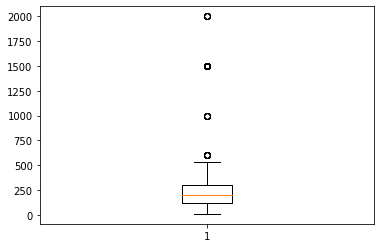

In [39]:
# dir(np.arange()
# x = np.arange(111146)


# axs[0,1].scatter(x, sub_date.Sales)
# plt.plot(x, sub_data.Sales, '--k')

plt.boxplot(sub_data.Sales)

# dir(plt)